In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random

1 - мерная задача теплопроводности:

$c \rho \dfrac{\partial T}{\partial t}=\dfrac{\partial}{\partial x}\left(\lambda \dfrac{\partial T}{\partial x}\right)+Q(x, t)$

Обезразмеренная задача принимает вид:

$\dfrac{\partial u}{\partial t}=\dfrac{\partial}{\partial x}\left(k(x, t, u) \dfrac{\partial u}{\partial x}\right)+q(x, \tau)$



### Явная схема:

$\dfrac{\hat{u}_m-u_m}{\tau}=\dfrac{1}{h}\left(\kappa_{m+\frac{1}{2}} \dfrac{u_{m+1}-u_m}{h}-\kappa_{m-\frac{1}{2}} \dfrac{u_m-u_{m-1}}{h}\right)+q_{m}$

Тогда выражение для $\hat{u}_m$ примет вид:

$\hat{u}_m = u_m+\dfrac{\tau}{h}\left(\kappa_{m+\frac{1}{2}} \dfrac{u_{m+1}-u_m}{h}-\kappa_{m-\frac{1}{2}} \dfrac{u_m-u_{m-1}}{h}\right)+q_{m} \tau$

Эта схема устойчива при условии $\tau \leqslant \dfrac{h^2}{2 a^2}$.

### Неявная схема:

$\dfrac{\hat{u}_m-u_m}{\tau}=\dfrac{1}{h}\left(\hat{\kappa}_{m+\frac{1}{2}} \dfrac{\hat{u}_{m+1}-\hat{u}_m}{h}-\hat{\kappa}_{m-\frac{1}{2}} \dfrac{\hat{u}_m-\hat{u}_{m-1}}{h}\right)+q_{m}$

В случае неявной схемы есть 2 варианта задачи: линейная и нелинейная.

#### Линейная:

$\hat{\kappa}_{m-\frac{1}{2}} \hat{u}_{m-1} - \left( \hat{\kappa}_{m-\frac{1}{2}} + \hat{\kappa}_{m+\frac{1}{2}} + \dfrac{h^2}{\tau}  \right) \hat{u}_m + \hat{\kappa}_{m+\frac{1}{2}} \hat{u}_{m+1} = - \dfrac{h^2}{\tau} \left(q_{m} \tau + u_m \right)$

$a_m = \hat{\kappa}_{m-\frac{1}{2}}$

$b_m = - \left( \hat{\kappa}_{m-\frac{1}{2}} + \hat{\kappa}_{m+\frac{1}{2}} + \dfrac{h^2}{\tau} \right)$

$c_m = \hat{\kappa}_{m+\frac{1}{2}}$

Получили 3-диагональную матрицу, решаемую прогонкой, условие диагонального преобладания выполнено.

#### Нелинейная:

Когда коэффициент теплопроводности зависит от $T$, будем решать уравнение методом Ньютона:

$\begin{aligned} \mathbf{F}\left(\mathbf{U}^{n+1}\right)=0 \Leftrightarrow & f_0\left(\mathbf{U}^{n+1}\right)=0 \\ & f_1\left(\mathbf{U}^{n+1}\right)=0 \\ \cdots & \\ & f_M\left(\mathbf{U}^{n+1}\right)=0\end{aligned}$

$\left(\mathbf{U}^{n+1}\right)^{k+1}=\left(\mathbf{U}^{n+1}\right)^k-\mathbf{J}^{-1}\left(\mathbf{U}^{n+1}\right)^k \cdot \mathbf{F}\left(\mathbf{U}^{n+1}\right)^k \text{, где:}$

$\mathbf{J}=\left(\begin{array}{ccc}\dfrac{\partial f_0}{\partial u_0} & \cdots & \dfrac{\partial f_0}{\partial u_M} \\ \vdots & \ddots & \vdots \\ \dfrac{\partial f_M}{\partial u_0} & \cdots & \dfrac{\partial f_M}{\partial u_M}\end{array}\right)$

$\mathbf{J}\left(\mathbf{U}^{n+1}\right)^k \left[ \left(\mathbf{U}^{n+1}\right)^{k+1}-\left(\mathbf{U}^{n+1}\right)^k \right]=-\mathbf{F}\left(\mathbf{U}^{n+1}\right)^k$

В нашем случае ненулевыми элементами матрицы будут только стоящие на 3-х диагоналях:

$\dfrac{\partial f_{m}}{\partial u_{m-1}} = \dfrac{\partial \kappa_{m-\frac{1}{2}}}{\partial u_{m-1}} \left( u_{m-1} - u_m \right) + \kappa_{m-\frac{1}{2}} \equiv a_m$

$\dfrac{\partial f_{m}}{\partial u_{m}} = \dfrac{\partial \kappa_{m-\frac{1}{2}}}{\partial u_{m-1}} \left( u_{m-1} - u_m \right) + \dfrac{\partial \kappa_{m+\frac{1}{2}}}{\partial u_{m+1}} \left( u_{m+1} - u_m \right) - \left( \kappa_{m-\frac{1}{2}} + \kappa_{m+\frac{1}{2}} + \dfrac{h^2}{\tau}  \right) \equiv b_m$

$\dfrac{\partial f_{m}}{\partial u_{m+1}} = \dfrac{\partial \kappa_{m+\frac{1}{2}}}{\partial u_{m+1}} \left( u_{m+1} - u_m \right) + \kappa_{m+\frac{1}{2}} \equiv c_m$

Производная от коэффициента теплопроводности $\kappa (u_m) = f(g(u_m))$ считается по следущей формуле:

$\dfrac{\partial \kappa}{\partial u_m} (u_m) = \dfrac{\partial f}{\partial g} (u_m) * \dfrac{\partial g}{\partial u_m} (u_m)$

В нашем случае предполагается, что у коэффициента теплопроводности линейная зависимость от температуры:

$\kappa (u_m) = \text{const}_1 \cdot u_m + \text{const}_2$ 

### Начальные и граничные условия

Нам необходимо реализовать солвер, решающий задачу для следующих начальных и граничных условий:

$1. \text{ } T(x, 0)=C_1, T(0, t)=C_2, T\left(x_{max}, t\right)=C_3 $

$
2. \text{ } T(x, 0)=C_1, T(0, t)=f(t), T\left(x_{max }, t\right)=C_3
$

$
3. \text{ } T(x, 0)=C_1, T(0, t)=C_2, T\left(x_{\text {max }}, t\right)=C_3, Q\left(x_1, t\right) = C 
$ - в определенной пользователем точке $x_1$

$
4. \text{ } T(x, 0)=C_1, T(0, t)=C_2, T\left(x_{\text {max }}, t\right)=\text C_3, Q\left(x_1, t\right)=g(t)
$ - в определенной пользователем точке $x_1, g(t)$ аналогична $f(t)$


Все эти граничные условия сводят нашу задачу к решению матрицы следующего вида:

$A  = \left( 
    \begin{array}{ccccccccc}  
    1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
    a_1 & b_1 & c_1 & 0 & \cdots & 0 & 0 & 0 & 0 \\
    0 & a_2 & b_2 & c_2 & \cdots & 0 & 0 & 0 & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & 0 & \cdots & a_{N-3} & b_{N-3} & c_{N-3} & 0 \\
    0 & 0 & 0 & 0 & \cdots & 0 & a_{N-2} & b_{N-2} & c_{N-2} \\
    0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 
    \end{array}
\right)$

In [9]:
class Heat_equation_Solver:

    def __init__(self, size_x, size_t):
        if (size_x>2 and type(size_x) == int and type(size_t) == int):
            self.__size_x = size_x
            self.__size_t = size_t
            self.__u = np.ones((size_t+1, size_x))
            self.__x_max = 1.
            self.__dx = 1./size_x
            self.__x = np.arange(1./2./size_x, 1, 1./size_x)
            self.__t_max = 1.
            self.__dt = 1./size_t
            self.__t = np.linspace(0,1,size_t+1)
            self.__const1 = 1.
            self.__const2 = 0.
            self.__k1 = 1.
            self.__k = np.ones(size_x)
            self.__k_mean = np.ones(size_x-1)*0.5
            self.__A = np.zeros((size_x, size_x))
            self.__eps = 1e-7
            self.__a = np.zeros(size_x-2)
            self.__b = np.zeros(size_x-2)
            self.__c = np.zeros(size_x-2)
            self.__y = np.zeros(size_x)
            self.__type_of_boarder_cond = 1
            self.__C1 = 1.
            self.__C2 = 1.
            self.__C3 = 1.       
            self.__C = 1.
            self.__x1 = int(size_x/2)
            self.__qx1 = np.zeros(size_t)
            self.__solver_type = 'i'
            self.__k_type = 'l'
        else:
            print("You should enter integer size_x greater then 2 and integer size_t")   

    # temperature getter and initializer

    def get_u(self):
        return self.__u

    # grid initialization

    def get_x_max(self):
        return self.__x_max

    def get_dx(self):
        return self.__dx

    def get_x(self):
        return self.__x

    def set_x_max(self, x_max):
        self.__dx = float(x_max)/self.__size_x
        self.__x_max = x_max
        self.__x = np.arange(1./2./self.__size_x, 1, 1./self.__size_x) * self.__x_max
        pass

    # time steps initialization

    def get_t_max(self):
        return self.__t_max

    def get_dt(self):
        return self.__dt

    def get_t(self):
        return self.__t

    def set_t_max(self, t_max):
        self.__dt = float(t_max)/self.__size_t
        self.__t_max = t_max
        self.__t = np.linspace(0, 1, self.__size_t+1) * self.__t_max
        pass

    # upflow and downflow to the cell

    def upflow(self, time_step, x_coord):
        return self.__k_mean[x_coord]*(self.__u[time_step, x_coord+1] - self.__u[time_step, x_coord])/self.__dx 

    def downflow(self, time_step, x_coord):
        return self.__k_mean[x_coord-1]*(self.__u[time_step, x_coord-1] - self.__u[time_step, x_coord])/self.__dx 

    # k initialization

    @property
    def const1(self):
        return self.__const1

    @const1.setter
    def const1(self, const1):
        self.__const1 = const1

    @property
    def const2(self):
        return self.__const2
    
    @const2.setter
    def const2(self, const2):
        self.__const2 = const2

    @property
    def k1(self):
        return self.__k1

    @k1.setter
    def k1(self, k1):
        self.__k1 = k1

    def get_k(self):
        return self.__k

    def set_k_T(self, time_step):
        self.__k = self.__u[time_step, :]*self.__const1 + self.__const2*np.ones(self.__size_x)
        pass  

    def set_fix_random_k(self):
        self.__k[0] = self.__k1
        self.__k[1:] = self.__k1 * np.random.random(self.__size_x-1)*2
        pass

    @staticmethod
    def k_harmonic_mean(a,b):
        return float(a*b)* 2/(a+b)

    @staticmethod
    def k_harmonic_mean_derivative(a,b):
        # dk/da for k = 2ab/(a+b) 
        return 2 * np.power(float(b),2) / np.power(a+b,2)

    def get_k_mean(self):
        return self.__k_mean

    def k_mean(self):
        for i in range(self.__size_x-1):
            self.__k_mean[i] = self.k_harmonic_mean(self.__k[i], self.__k[i+1]) 
        pass

    def k_derivative(self):
        # k = const1 * T + const_2
        return self.__const1
    
    def k_final_derivative(self, k1, k2):
        return self.k_harmonic_mean_derivative(k1, k2) * self.k_derivative()
    
    def get_k_type(self):
        return self.__k_type

    def set_k_type(self, typ):
        if (typ == 'l' or typ == 'n'):
            self.__k_type = typ
        else:
            print("You should choose 'l' if linear solver and 'n' if nonlinear solver")

    # boarder and initial conditional constants

    @property
    def C1(self):
        return self.__C1

    @C1.setter
    def C1(self, C1):
        self.__C1 = C1

    @property
    def C2(self):
        return self.__C2

    @C2.setter
    def C2(self, C2):
        self.__C2 = C2

    @property
    def C3(self):
        return self.__C3

    @C3.setter
    def C3(self, C3):
        self.__C3 = C3

    @property
    def C(self):
        return self.__C

    @C.setter
    def C(self, C):
        self.__C = C
    
    @staticmethod
    def f(t):
        return t
    
    # get q to cell x1

    def get_qx1(self):
        return self.__qx1

    def get_x1(self):
        return self.__x1

    def set_x1(self, x1):
        if (x1 > 0 and x1 < self.__size_x - 1 and type(x1) == int):
            self.__x1 = x1
        else:
            print("Enter int x1 from 0 to size_x-1")
        pass

    def set_type_of_boarder_cond(self, num):
        if (num in [1, 2, 3, 4]):
            self.__type_of_boarder_cond = num
        else:
            print("You should enter one of the folowing int numbers: [1, 2, 3, 4]")

    def boarder_cond(self):       
        if (self.__type_of_boarder_cond == 1):
            return self.set_1_type_boarder_condition()

        if (self.__type_of_boarder_cond == 2):
            return self.set_2_type_boarder_condition()

        if (self.__type_of_boarder_cond == 3):
            return self.set_3_type_boarder_condition()

        if (self.__type_of_boarder_cond == 4):
            return self.set_4_type_boarder_condition()      

    # matrix to solve

    def get_A(self):
        return self.__A

    def A_matrix(self, a, b, c):
        self.__A = np.zeros((self.__size_x, self.__size_x))
        self.__A[0, 0] = 1.
        self.__A[-1, -1] = 1.
        for i in range(1,self.__size_x-1):
            self.__A[i, i-1] = a[i-1]
            self.__A[i, i] = b[i-1]
            self.__A[i, i+1] = c[i-1]
        return self.__A 

    @property
    def eps(self):
        return self.__eps

    @eps.setter
    def eps(self, eps):
        self.__eps = eps

    # choose a solver type

    def get_solver_type(self):
        return self.__solver_type

    def set_solver_type(self, typ):
        if (typ == 'i' or typ == 'e'):
            self.__solver_type = typ
        else:
            print("You should choose 'e' if explicit solver and 'i' if implicit solver")

    def solver(self):
        if (self.__solver_type == 'e'):
            return self.explicit_solver()
        elif (self.__solver_type == 'i'):
            return self.implicit_solver()
        
    #explicit solver

    def explicit_solver(self): 
        self.boarder_cond()
        if (self.__k_type == 'l'):
            self.set_fix_random_k()
            self.k_mean()
            for time_step in range(1, self.__size_t+1):
                for x_coord in range(1, self.__size_x-1):
                    self.__u[time_step, x_coord] = self.__u[time_step - 1, x_coord] + self.__dt/self.__dx*(self.upflow(time_step - 1, x_coord) + self.downflow(time_step - 1, x_coord))
                self.__u[time_step, self.__x1] += self.__qx1[time_step - 1] * self.__dt
        elif (self.__k_type == 'n'):
            for time_step in range(1, self.__size_t+1):
                self.set_k_T(time_step)
                self.k_mean()
                for x_coord in range(1, self.__size_x-1):
                    self.__u[time_step, x_coord] = self.__u[time_step - 1, x_coord] + self.__dt/self.__dx*(self.upflow(time_step - 1, x_coord) + self.downflow(time_step - 1, x_coord))
                self.__u[time_step, self.__x1] += self.__qx1[time_step - 1] * self.__dt
        return self.__u

    #implicit solver

    #linear solver

    def a_linear(self):
        for i in range(self.__size_x-2):
            self.__a[i] = self.__k_mean[i] 
        return self.__a

    def b_linear(self):
        for i in range(self.__size_x-2):
            self.__b[i] = -(self.__k_mean[i] + self.__k_mean[i+1] + np.power(self.__dx, 2) / self.__dt)
        return self.__b

    def c_linear(self):
        for i in range(self.__size_x-2):
            self.__c[i] = self.__k_mean[i+1] 
        return self.__c

    def linear_solver(self):
        self.boarder_cond()
        self.set_fix_random_k()
        self.k_mean()
        self.__A = self.A_matrix(self.a_linear(), self.b_linear(), self.c_linear())
        for time_step in range(1, self.__size_t+1):
            self.__y[0], self.__y[-1] = self.__u[time_step, 0], self.__u[time_step, -1]
            self.__y[1:-1] = - self.__u[time_step - 1, 1:-1] * np.power(self.__dx, 2) / self.__dt
            self.__y[self.__x1] -= self.__qx1[time_step - 1] * np.power(self.__dx, 2)
            self.__u[time_step, 1:-1] = np.linalg.solve(self.__A, self.__y)[1:-1]
        return self.__u

    #nonlinear solver

    def a_nonlinear(self, time_step):
        for i in range(self.__size_x-2):
            self.__a[i] = self.__k_mean[i] + self.k_final_derivative(self.__k[i], self.__k[i+1])*(self.__u[time_step, i] - self.__u[time_step, i+1]) 
        return self.__a

    def b_nonlinear(self, time_step):
        for i in range(self.__size_x-2):
            self.__b[i] = self.k_final_derivative(self.__k[i+2], self.__k[i+1])*(self.__u[time_step, i+2] - self.__u[time_step, i+1]) + self.k_final_derivative(self.__k[i], self.__k[i+1])*(self.__u[time_step, i] - self.__u[time_step, i+1])-(self.__k_mean[i] + self.__k_mean[i+1] + np.power(self.__dx, 2) / self.__dt)
        return self.__b

    def c_nonlinear(self, time_step):
        for i in range(self.__size_x-2):
            self.__c[i] = self.__k_mean[i+1] + self.k_final_derivative(self.__k[i+2], self.__k[i+1])*(self.__u[time_step, i+2] - self.__u[time_step, i+1])
        return self.__c        

    def y_nonlinear(self, time_step):
        for i in range(1, self.__size_x-1):
            self.__y[i] = - self.__k_mean[i-1]*(self.__u[time_step-1, i-1] - self.__u[time_step-1, i]) - self.__k_mean[i] * (self.__u[time_step-1, i+1] - self.__u[time_step-1, i])
        self.__y[self.__x1] -= np.power(self.__dx, 2) * self.__qx1[time_step - 1]
        pass

    def nonlinear_solver(self):
        self.boarder_cond()
        for time_step in range(1, self.__size_t+1):
            self.set_k_T(time_step)
            self.k_mean()
            self.__A = self.A_matrix(self.a_nonlinear(time_step), self.b_nonlinear(time_step), self.c_nonlinear(time_step))
            self.y_nonlinear(time_step)       
            self.__u[time_step, 1:-1] = np.linalg.solve(self.__A, self.__y)[1:-1] + self.__u[time_step - 1, 1:-1]
        return self.__u

    #implicit solver itself

    def implicit_solver(self):
        if (self.__k_type == 'l'):
            return self.linear_solver()        
        elif (self.__k_type == 'n'):
            return self.nonlinear_solver()      

    #boarder conditions 

    def set_1_type_boarder_condition(self):
        self.__u = np.zeros((self.__size_t+1, self.__size_x))  
        self.__u[0, :], self.__u[1:, 0], self.__u[1:, -1] = self.__C1, self.__C2, self.__C3 
        self.__y = np.zeros(self.__size_x)
        self.__qx1 = np.zeros(self.__size_t)
        pass
    
    def set_2_type_boarder_condition(self):
        self.__u = np.zeros((self.__size_t+1, self.__size_x))  
        self.__u[0, :], self.__u[1:, 0], self.__u[1:, -1] = self.__C1, self.f(self.__t[1:]), self.__C3 
        self.__y = np.zeros(self.__size_x)     
        self.__qx1 = np.zeros(self.__size_t) 
        pass
    
    def set_3_type_boarder_condition(self):
        self.__u = np.zeros((self.__size_t+1, self.__size_x))  
        self.__u[0, :], self.__u[1:, 0], self.__u[1:, -1] = self.__C1, self.__C2, self.__C3
        self.__y = np.zeros(self.__size_x)      
        self.__qx1 = self.__C * np.ones(self.__size_t)
        pass 

    def set_4_type_boarder_condition(self):
        self.__u = np.zeros((self.__size_t+1, self.__size_x))  
        self.__u[0, :], self.__u[1:, 0], self.__u[1:, -1] = self.__C1, self.__C2, self.__C3 
        self.__y = np.zeros(self.__size_x) 
        self.__qx1 = self.f(self.__t[1:])
        pass
    
    # plotting a graph

    def showplot(self, time_step):
        if (self.__solver_type == 'e'):
            plt.title('Explicit solver with ' + f'{self.__type_of_boarder_cond} type of boarder conditions (time step = ' + f'{time_step})')
        else:
            plt.title('Implicit solver with ' + f'{self.__type_of_boarder_cond} type of boarder conditions (time step = ' + f'{time_step})')
        plt.plot(self.__x, self.__u[time_step, :])
        if (self.__type_of_boarder_cond == 3 or self.__type_of_boarder_cond == 4):
            plt.axvline(x = self.__x1 * self.__dx, color = 'orange', linestyle = '--', label = f'x1 = {self.__x1}')
            plt.legend()
        plt.xlabel('x')
        plt.ylabel(f'u[{time_step}, x]')
        plt.show()

Вначале нужно задать все необходимые константы для работы с программой

In [11]:
s = Heat_equation_Solver(100, 100) # здесь нужно сразу определиться с количеством шагов по времени и количеством клеток по x 
s.set_x_max(5.) # выбор максимальной длины по x
s.set_t_max(6.) # выбор максимального времени расчета
s.set_type_of_boarder_cond(3) # выбор 1, 2, 3, или 4 граничного услловия
s.C1 = 2 # T(x, 0) = C1
s.C2 = 2 # T(0, t) = C2
s.C3 = 3 # T(xmax, t) = C3
# если выбирать 3 и 4 граничные условия, то нужно задать клетку x1 и значения потока в эту ячейку 
s.set_x1(int(40)) # задание номера клетки
s.C = 4 # значение потока
# выбор типа коэффициента теплопроводности:
s.set_k_type('l') # 'l', если выбирать фиксированный рандомный k; 'n', если k зависит от температуры
# если выбирать фиксированный рандомный k, то он будет считаться по формуле k = k1 * 2 * np.random.random()
s.k1 = 1 # выбор амплитудного значения k
# если выбирать зависящий от Т k, то считается, что k(T) = const1 * T + const2
s.const1 = 1 #  
s.const2 = 1 # 

Явная схема (коэффциент теплопроводности не зависит от решения - линейная задача) 

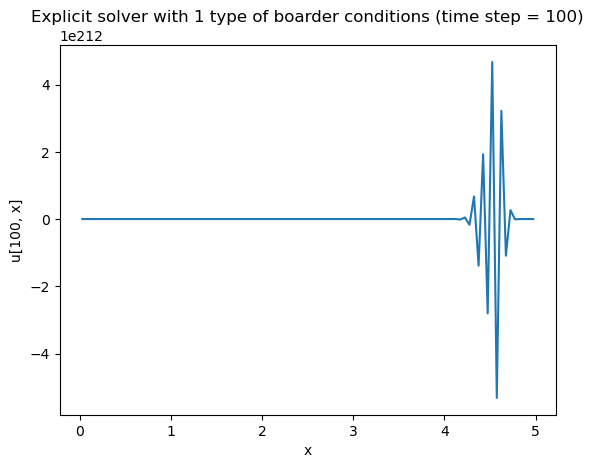

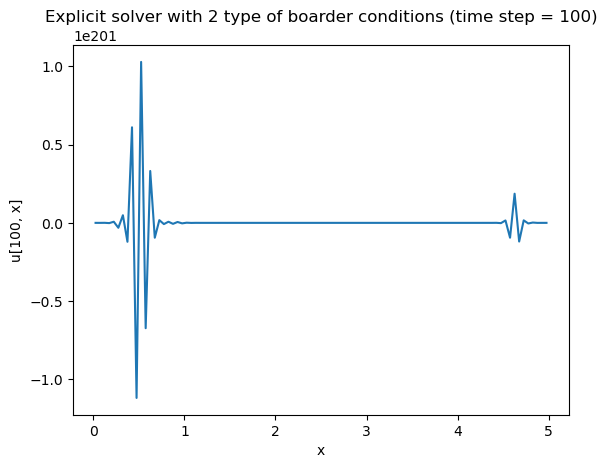

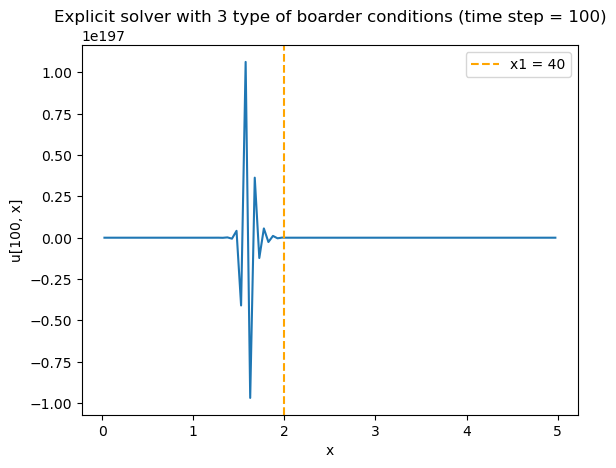

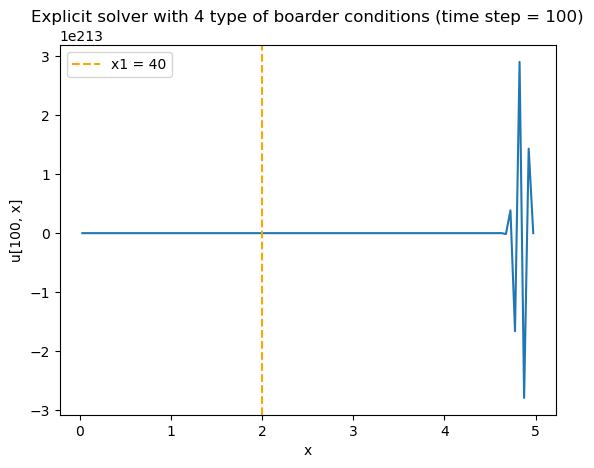

In [12]:
s.set_solver_type('e')
s.set_k_type('l')
for i in range(1, 5):
    s.set_type_of_boarder_cond(i)
    s.explicit_solver()
    s.showplot(100)

Явная схема (коэффциент теплопроводности зависит от решения - нелинейная задача) 

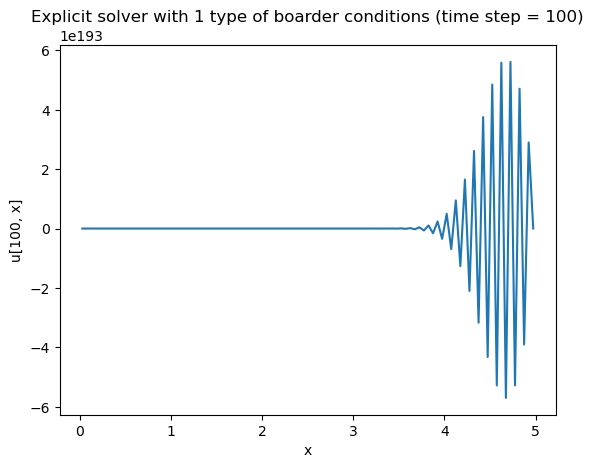

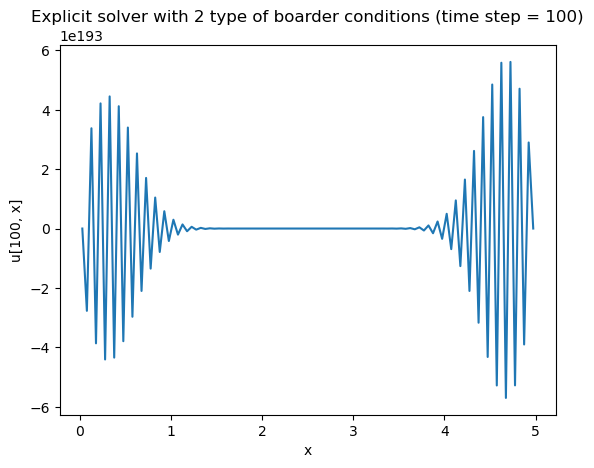

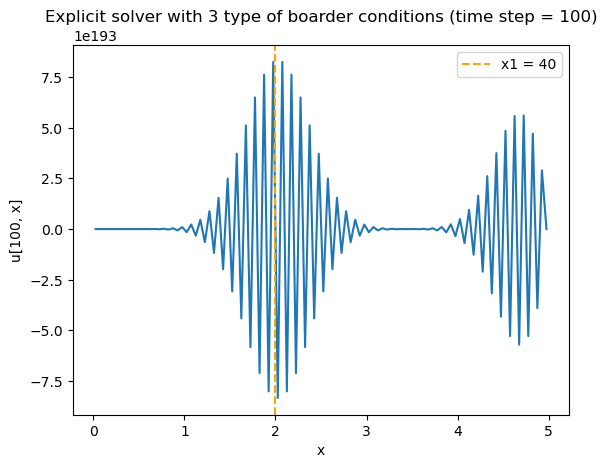

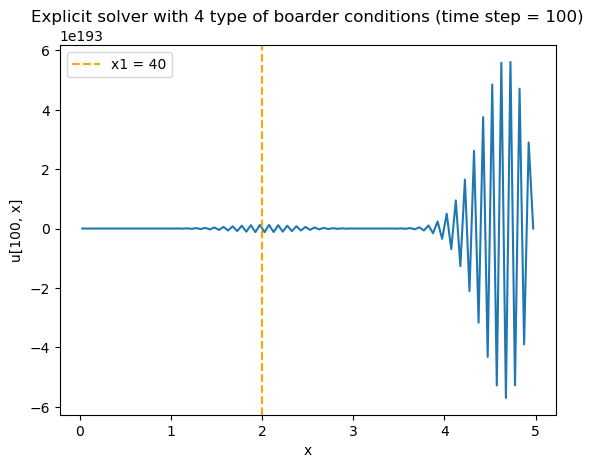

In [13]:
s.set_solver_type('e')
s.set_k_type('n')
for i in range(1, 5):
    s.set_type_of_boarder_cond(i)
    s.explicit_solver()
    s.showplot(100)

Неявная схема (коэффциент теплопроводности не зависит от решения - линейная задача)

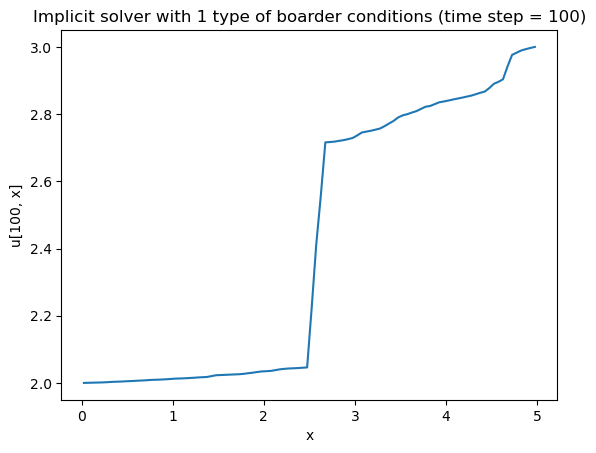

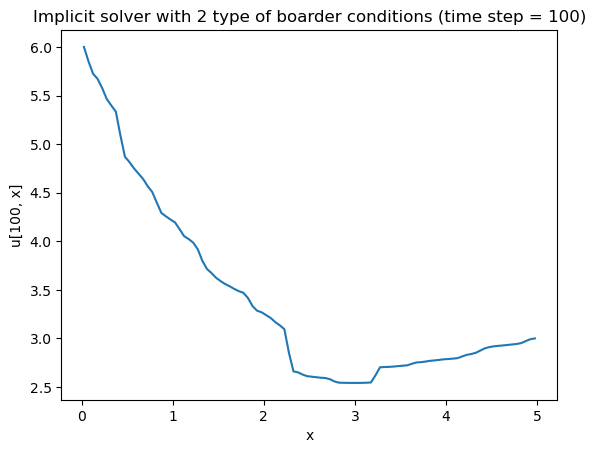

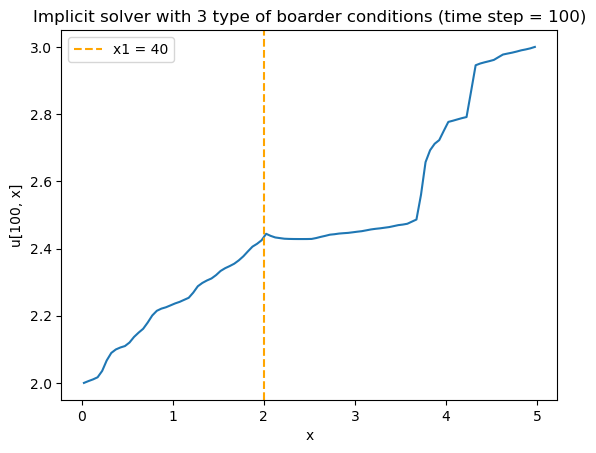

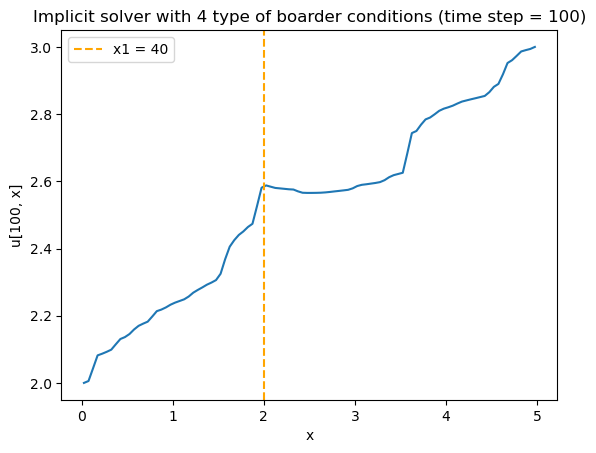

In [14]:
s.set_solver_type('i')
s.set_k_type('l')
for i in range(1, 5):
    s.set_type_of_boarder_cond(i)
    s.implicit_solver()
    s.showplot(100)

Неявная схема (коэффциент теплопроводности зависит от решения - нелинейная задача)

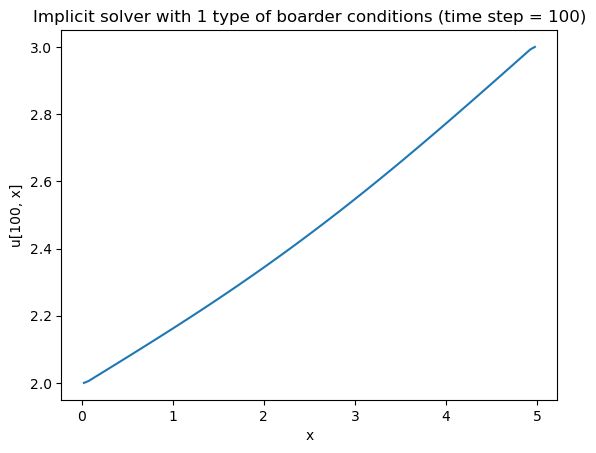

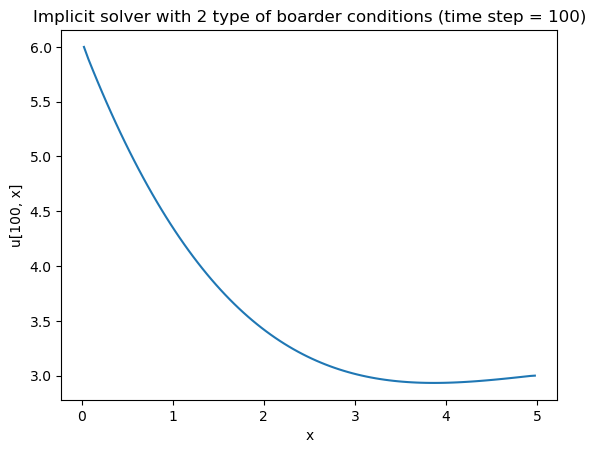

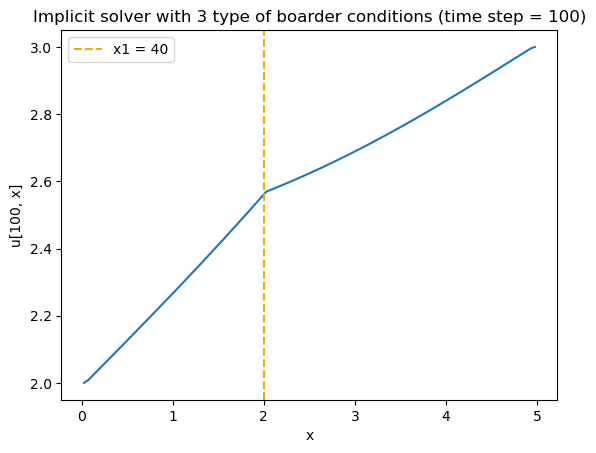

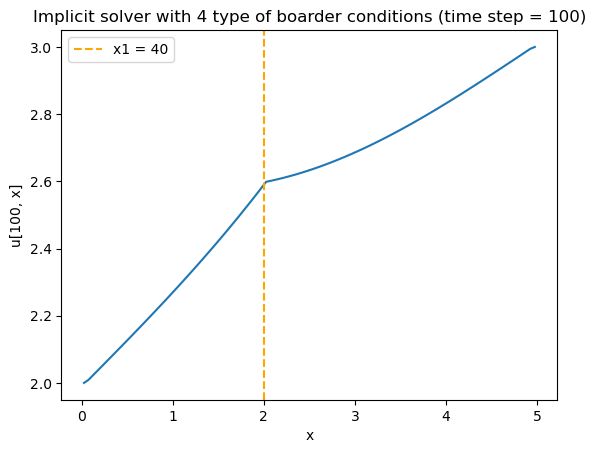

In [15]:

s.set_solver_type('i')
s.set_k_type('n')
s.eps = 1e-7
for i in range(1, 5):
    s.set_type_of_boarder_cond(i)
    s.implicit_solver()
    s.showplot(100)